# KIA 10 Y
- period
    - 2009-03-23 ~ 2018-05-30
- features
    - ['k', 'fitN', 'a0', 'a1', 'b0', 'tau']

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def strToDate(tt):
    return pd.to_datetime(tt, yearfirst=True)

def strToTimeDelta(tt):
    return pd.Timedelta(float(tt), unit='S')

In [3]:
# read features from text file
# 날짜    k    fitting수    <a0>    <a1>    <b0>    <τ>
filename = 'action(1+1)Param_04'
labels = ['date','k','fitN','a0','a1','b0','tau']
df = pd.read_csv(filename, sep='\t', 
                 header=None,
                 converters={0: strToDate},
                 names = labels) #, lineterminator='\r\n')

In [4]:
df.shape # 2276 market-open days for 10 years

(22760, 7)

In [5]:
df.head(10)

,date,k,fitN,a0,a1,b0,tau
0,2009-03-23,1,37,-2.727038,0.001550,2.984912,1461.122
1,2009-03-23,2,38,-3.703672,0.001828,3.313493,1499.507
2,2009-03-23,3,28,-3.933671,0.002574,4.407811,1292.837
3,2009-03-23,4,13,-4.360880,0.002469,4.251816,1329.968
4,2009-03-23,5,30,-3.669309,0.001936,3.896841,1547.975
5,2009-03-23,6,18,-3.317302,0.001605,3.441775,1681.609
6,2009-03-23,7,25,-3.789300,0.001868,3.772554,1597.517
7,2009-03-23,8,27,-2.920232,0.001748,3.582601,1526.722
8,2009-03-23,9,24,-2.455292,0.001631,3.674260,1628.337
9,2009-03-23,10,27,-2.013126,0.001319,3.246674,1772.121


In [6]:
df.tail()

,date,k,fitN,a0,a1,b0,tau
22755,2018-05-30,6,38,-0.619580,0.000034,1.086507,24645.88
22756,2018-05-30,7,38,-0.557049,0.000030,0.952689,24562.41
22757,2018-05-30,8,39,-0.595521,0.000031,1.025429,24977.92
22758,2018-05-30,9,40,-0.570060,0.000030,0.986699,25263.94
22759,2018-05-30,10,24,-0.619659,0.000033,1.065320,24705.70


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22760 entries, 0 to 22759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    22760 non-null  datetime64[ns]
 1   k       22760 non-null  int64         
 2   fitN    22760 non-null  int64         
 3   a0      22760 non-null  float64       
 4   a1      22760 non-null  float64       
 5   b0      22760 non-null  float64       
 6   tau     22760 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 MB


In [8]:
# df.to_csv('kia_param04.csv', index=None)

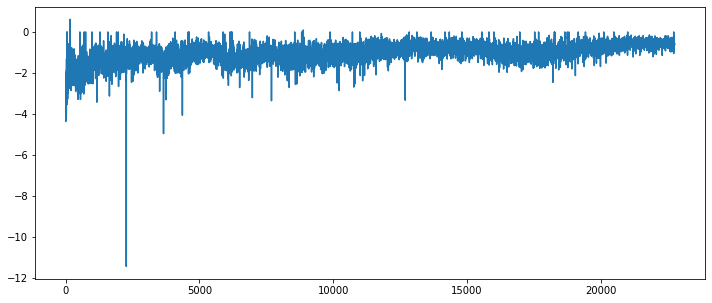

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['a0'])

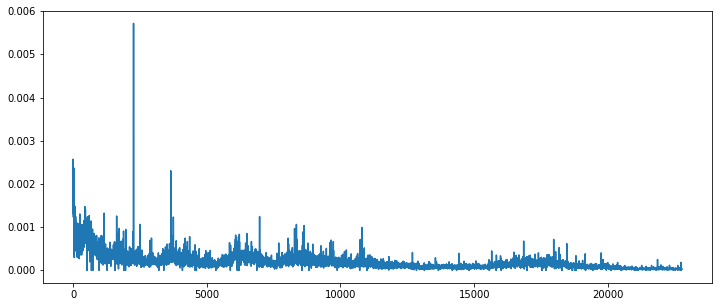

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df['a1'])

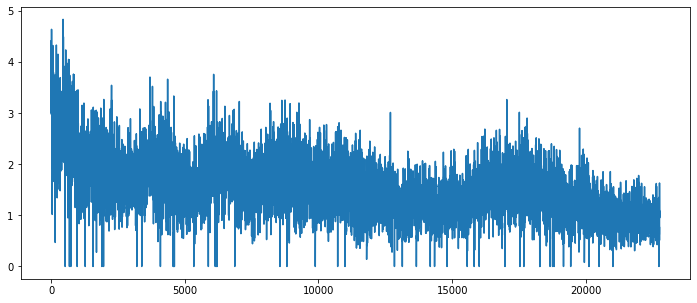

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['b0'])

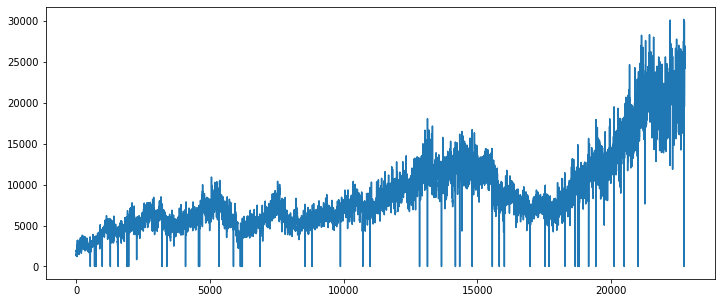

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df['tau'])

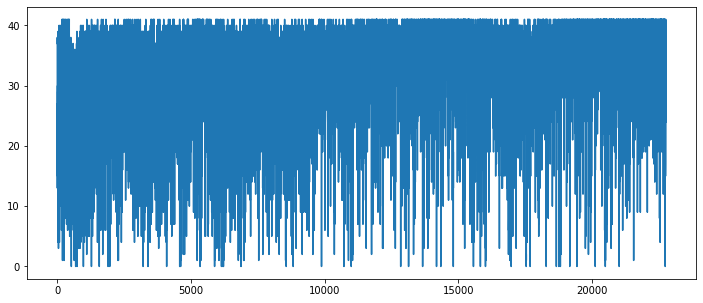

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['fitN'])

In [14]:
np.min(df['a0']),np.min(df['a1']),np.min(df['b0']),np.min(df['tau']),np.min(df['fitN'])

(-11.43127, 0.0, 0.0, 0.0, 0)

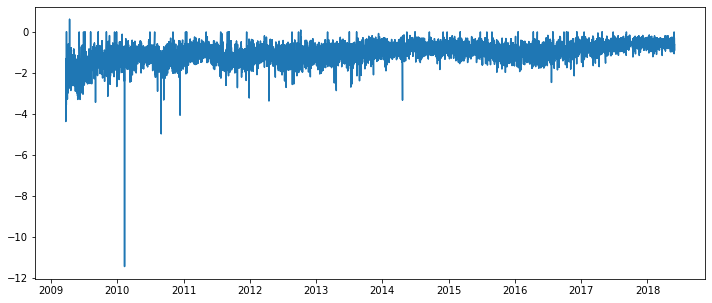

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['date'],df['a0'])

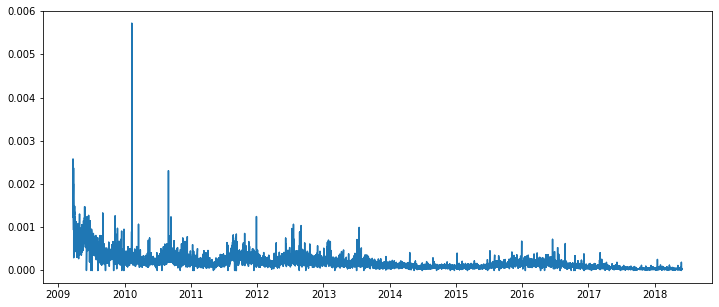

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df['date'],df['a1'])

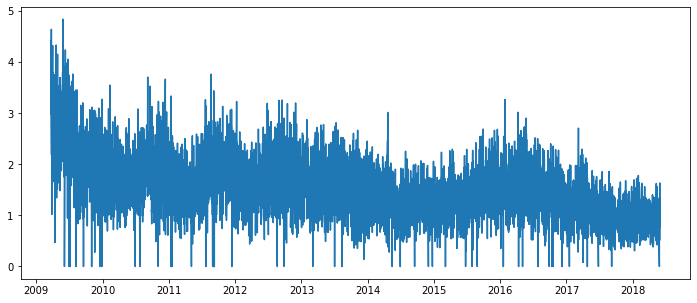

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df['date'],df['b0'])

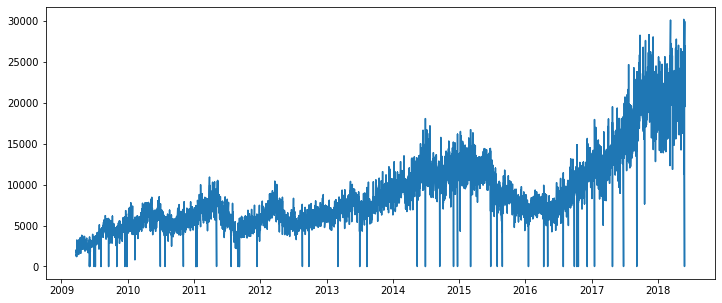

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['date'],df['tau'])

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df_kia['Close'])

NameError: ignored

<Figure size 864x360 with 0 Axes>

# FDR

In [20]:
!pip install finance-datareader

In [21]:
import FinanceDataReader as fdr

In [22]:
symbol = '000270' # KIA Car
sdate = '2009-03-23'
edate = '2018-05-30'
df_kia = fdr.DataReader(symbol,sdate,edate)
# df = df.reset_index()

In [23]:
df['date'][0],df['date'][0].strftime('%Y-%m-%d')

(Timestamp('2009-03-23 00:00:00'), '2009-03-23')

In [24]:
df_kia.shape  # 2276 days

(2276, 6)

In [25]:
df_kia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2276 entries, 2009-03-23 to 2018-05-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2276 non-null   int64  
 1   High    2276 non-null   int64  
 2   Low     2276 non-null   int64  
 3   Close   2276 non-null   int64  
 4   Volume  2276 non-null   int64  
 5   Change  2276 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 124.5 KB


In [26]:
df_kia.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-03-23,7850,8120,7800,8080,8344058,0.049351
2009-03-24,8240,8260,8010,8180,6652120,0.012376
2009-03-25,8120,8180,7970,8100,5107740,-0.009780
2009-03-26,8170,8480,8110,8420,13682048,0.039506
2009-03-27,8570,9070,8470,8490,16489312,0.008314


In [27]:
df_kia.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-24,33450,33450,32100,32700,1750711,-0.028232
2018-05-25,32550,32750,32000,32250,796582,-0.013761
2018-05-28,32450,32500,31900,32300,721091,0.001550
2018-05-29,32250,32400,31600,31650,896720,-0.020124
2018-05-30,31450,31950,31400,31700,885930,0.001580


In [28]:
df.tail()

,date,k,fitN,a0,a1,b0,tau
22755,2018-05-30,6,38,-0.619580,0.000034,1.086507,24645.88
22756,2018-05-30,7,38,-0.557049,0.000030,0.952689,24562.41
22757,2018-05-30,8,39,-0.595521,0.000031,1.025429,24977.92
22758,2018-05-30,9,40,-0.570060,0.000030,0.986699,25263.94
22759,2018-05-30,10,24,-0.619659,0.000033,1.065320,24705.70


In [29]:
df_lastday=df[df['date']=='2018-05-30']

In [ ]:
df_lastday

In [30]:
df_lastday.shape

(10, 7)

In [ ]:
# features of one day : 50
# a0k01 ~ a0k10
# a1k01 ~ a1k10
# b0k01 ~ b0k10
# tau01 ~ tau10
# fb01 ~ fn10

# features of one day : 10x4 = 40

- $a_0 (k)$ : a0k01 ~ a0k10
- $a_1 (k)$ : a1k01 ~ a1k10
- $b_0 (k)$ : b0k01 ~ b0k10
- $\tau(k)$ : tau01 ~ tau10
- $fn(k)$ : fn01 ~ fn10
- $ 1 \le k \le 10 $

# 40 featues show complex dynamics in a day => predict what?
- C1 >< O1 (Close >< Open in a day)
- O1 >< O2 (Open in the next day >< Open in a day)
- O1 >< C2 (Close in the next day >< Open in a day)
- C1 >< O2 (Open in the next day >< Close in a day)
- C1 >< C2 (Close in the next day >< Close in a day)
- O2 >< C2 (Close >< Open in the next day)


## Graph of a0,a1,b0,tau along k, $ 1 \le k \le 10 $

In [31]:
df[df['k']==1]['a0'].shape,df[df['k']==1]['date'].shape

((2276,), (2276,))

### a0(k)

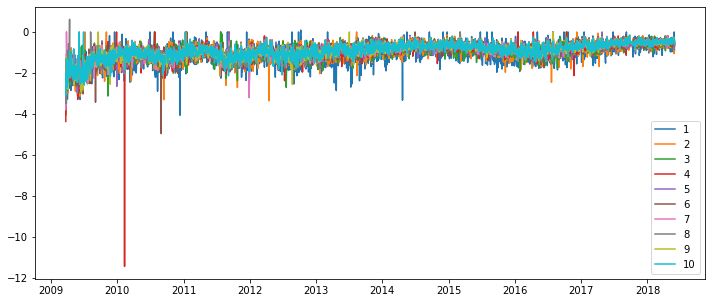

In [57]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a0'])
plt.legend(list(range(1,kf)))
plt.show()

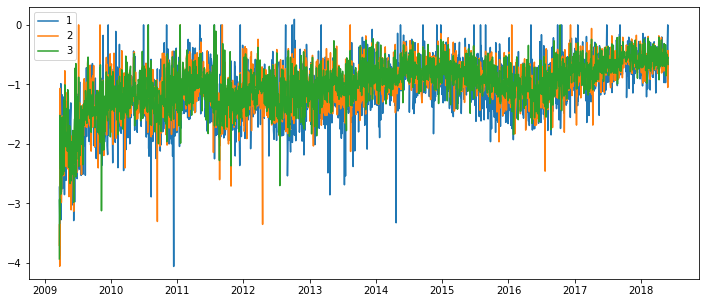

In [58]:
plt.figure(figsize=(12,5))
kf=4
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a0'])
plt.legend(list(range(1,kf)))
plt.show()

In [35]:
# check zeros
df[df['a0']==0].shape

(62, 7)

### a1(k)

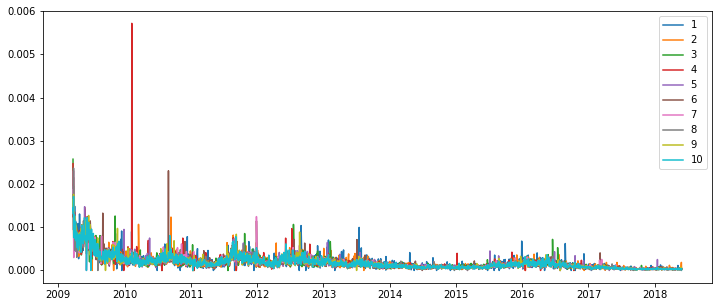

In [56]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a1'])
plt.legend(list(range(1,kf)))
plt.show()

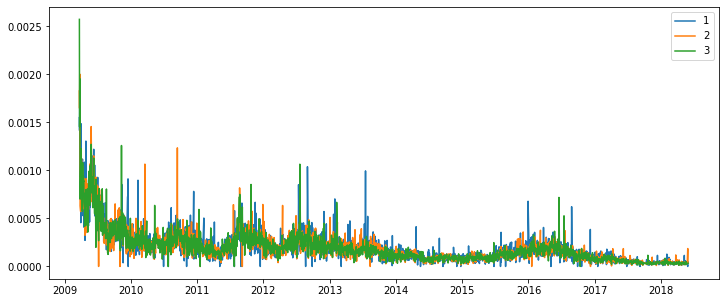

In [59]:
plt.figure(figsize=(12,5))
kf=4
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['a1'])
plt.legend(list(range(1,kf)))
plt.show()

In [37]:
# check zeros
df[df['a1']==0].shape

(62, 7)

### b0(k)

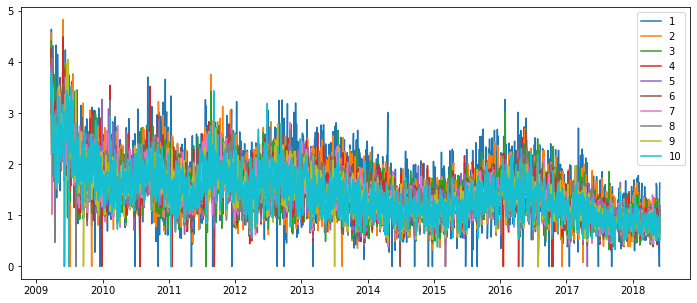

In [55]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['b0'])
plt.legend(list(range(1,kf)))
plt.show()

In [39]:
# check zeros
df[df['b0']==0].shape

(62, 7)

### $\tau (k) $

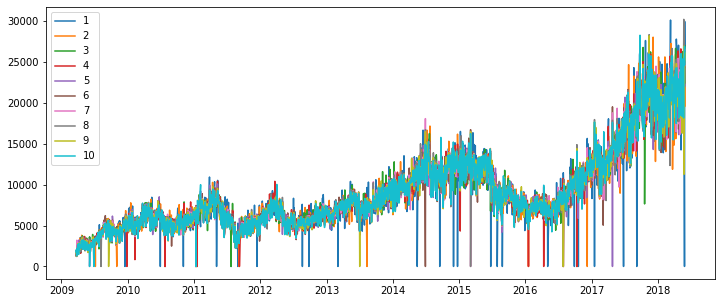

In [54]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['tau'])
plt.legend(list(range(1,kf)))
plt.show()

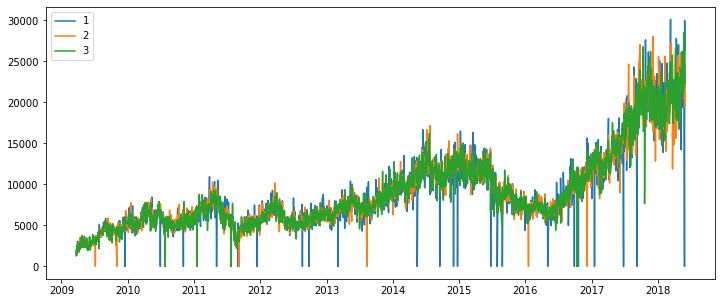

In [60]:
plt.figure(figsize=(12,5))
kf=4
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['tau'])
plt.legend(list(range(1,kf)))
plt.show()

In [41]:
# check zeros
df[df['tau']==0].shape

(62, 7)

In [53]:
for i in range(1,11):
    print("k=", i, ", zeros of tau:", (df[df['k']==i]['tau']==0).astype(int).sum())


k= 1 , zeros of tau: 25
k= 2 , zeros of tau: 7
k= 3 , zeros of tau: 4
k= 4 , zeros of tau: 9
k= 5 , zeros of tau: 1
k= 6 , zeros of tau: 1
k= 7 , zeros of tau: 4
k= 8 , zeros of tau: 4
k= 9 , zeros of tau: 4
k= 10 , zeros of tau: 3


### fitNumber(k)

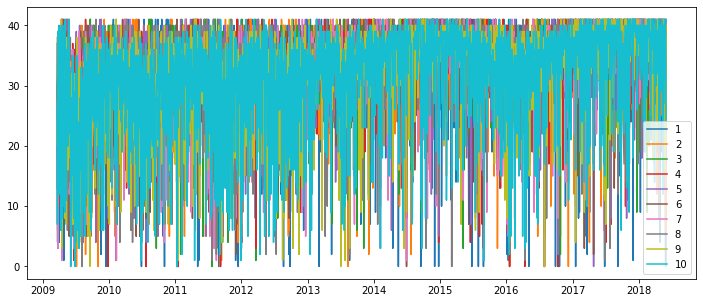

In [61]:
plt.figure(figsize=(12,5))
kf=11
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['fitN'])
plt.legend(list(range(1,kf)))
plt.show()

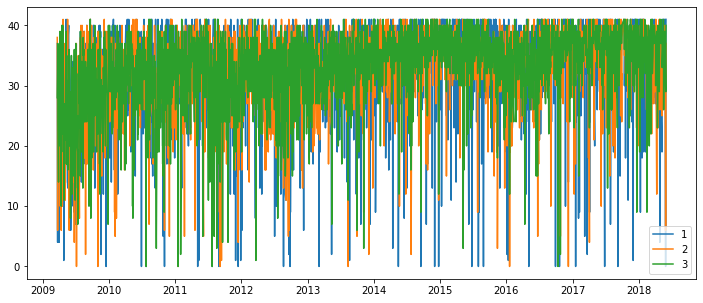

In [62]:
plt.figure(figsize=(12,5))
kf=4
for i in range(1,kf):
    plt.plot(df[df['k']==1]['date'],df[df['k']==i]['fitN'])
plt.legend(list(range(1,kf)))
plt.show()

In [44]:
# check zeros
df[df['fitN']==0].shape

(62, 7)

In [52]:
# check zeros along k, $1 \le k \le 10$
# (df == 0).astype(int).sum(axis=1) # hint 
for i in range(1,11):
    print("k=", i, ", zeros of fitN:", (df[df['k']==i]['fitN']==0).astype(int).sum())


k= 1 , zeros of fitN: 25
k= 2 , zeros of fitN: 7
k= 3 , zeros of fitN: 4
k= 4 , zeros of fitN: 9
k= 5 , zeros of fitN: 1
k= 6 , zeros of fitN: 1
k= 7 , zeros of fitN: 4
k= 8 , zeros of fitN: 4
k= 9 , zeros of fitN: 4
k= 10 , zeros of fitN: 3


## Rearrangenent of 40 features
- 10 x 4 => 1 X 40

In [ ]:
df_lastday.iloc[:,3:]

,a0,a1,b0,tau
22750,-0.909242,0.000047,1.630237,26317.73
22751,-0.717859,0.000038,1.179362,24196.48
22752,-0.663725,0.000034,1.184611,27001.12
22753,-0.557721,0.000030,0.946422,24538.75
22754,-0.586936,0.000031,1.003503,25239.68
22755,-0.619580,0.000034,1.086507,24645.88
22756,-0.557049,0.000030,0.952689,24562.41
22757,-0.595521,0.000031,1.025429,24977.92
22758,-0.570060,0.000030,0.986699,25263.94
22759,-0.619659,0.000033,1.065320,24705.70


In [ ]:
df1 = df_lastday.iloc[:,2:].values
df1
# 

array([[ 4.100000e+01, -9.092425e-01,  4.726604e-05,  1.630237e+00,
         2.631773e+04],
       [ 3.700000e+01, -7.178591e-01,  3.804700e-05,  1.179362e+00,
         2.419648e+04],
       [ 4.000000e+01, -6.637255e-01,  3.351945e-05,  1.184611e+00,
         2.700112e+04],
       [ 3.400000e+01, -5.577212e-01,  2.978091e-05,  9.464223e-01,
         2.453875e+04],
       [ 3.300000e+01, -5.869357e-01,  3.069025e-05,  1.003503e+00,
         2.523968e+04],
       [ 3.800000e+01, -6.195801e-01,  3.381641e-05,  1.086507e+00,
         2.464588e+04],
       [ 3.800000e+01, -5.570494e-01,  2.988899e-05,  9.526887e-01,
         2.456241e+04],
       [ 3.900000e+01, -5.955210e-01,  3.142116e-05,  1.025429e+00,
         2.497792e+04],
       [ 4.000000e+01, -5.700596e-01,  2.989930e-05,  9.866988e-01,
         2.526394e+04],
       [ 2.400000e+01, -6.196593e-01,  3.303405e-05,  1.065320e+00,
         2.470570e+04]])

In [ ]:
df1.T.reshape(1,-1).shape

(1, 50)

In [ ]:
df1.T.reshape(1,-1)

array([[ 4.100000e+01,  3.700000e+01,  4.000000e+01,  3.400000e+01,
         3.300000e+01,  3.800000e+01,  3.800000e+01,  3.900000e+01,
         4.000000e+01,  2.400000e+01, -9.092425e-01, -7.178591e-01,
        -6.637255e-01, -5.577212e-01, -5.869357e-01, -6.195801e-01,
        -5.570494e-01, -5.955210e-01, -5.700596e-01, -6.196593e-01,
         4.726604e-05,  3.804700e-05,  3.351945e-05,  2.978091e-05,
         3.069025e-05,  3.381641e-05,  2.988899e-05,  3.142116e-05,
         2.989930e-05,  3.303405e-05,  1.630237e+00,  1.179362e+00,
         1.184611e+00,  9.464223e-01,  1.003503e+00,  1.086507e+00,
         9.526887e-01,  1.025429e+00,  9.866988e-01,  1.065320e+00,
         2.631773e+04,  2.419648e+04,  2.700112e+04,  2.453875e+04,
         2.523968e+04,  2.464588e+04,  2.456241e+04,  2.497792e+04,
         2.526394e+04,  2.470570e+04]])

In [ ]:
df.shape,df.iloc[:,2:].shape,df.iloc[:,2:].values.shape


((22760, 7), (22760, 5), (22760, 5))

In [ ]:
df.iloc[:,2:].values.T.reshape(1,50,-1).shape

(1, 50, 2276)

In [ ]:
df.head(10)

,date,k,fitN,a0,a1,b0,tau
0,2009-03-23,1,37,-2.727038,0.001550,2.984912,1461.122
1,2009-03-23,2,38,-3.703672,0.001828,3.313493,1499.507
2,2009-03-23,3,28,-3.933671,0.002574,4.407811,1292.837
3,2009-03-23,4,13,-4.360880,0.002469,4.251816,1329.968
4,2009-03-23,5,30,-3.669309,0.001936,3.896841,1547.975
5,2009-03-23,6,18,-3.317302,0.001605,3.441775,1681.609
6,2009-03-23,7,25,-3.789300,0.001868,3.772554,1597.517
7,2009-03-23,8,27,-2.920232,0.001748,3.582601,1526.722
8,2009-03-23,9,24,-2.455292,0.001631,3.674260,1628.337
9,2009-03-23,10,27,-2.013126,0.001319,3.246674,1772.121


In [ ]:
df.iloc[:,2:].values.T.reshape(-1,10,5).shape

(2276, 10, 5)

In [ ]:
df.iloc[:,2:].values.T.reshape(-1,10,5)[0].shape

(10, 5)

In [ ]:
df.iloc[:,2:].values.T.reshape(-1,10,5)[-1]

array([[27592.76, 23938.41, 28550.39, 27705.77, 27346.57],
       [26530.38, 28559.45, 30225.58, 26938.09, 25252.68],
       [25118.36, 24177.87, 25822.77, 21860.54, 20519.8 ],
       [25938.52, 25275.38, 24235.08, 11276.32, 24566.47],
       [    0.  , 23944.48, 24380.62, 25779.98, 22340.07],
       [24330.83, 26612.55, 26190.91, 24455.42, 26901.06],
       [29970.86, 19545.98, 22231.27, 25134.9 , 22010.64],
       [25308.13, 26093.22, 26054.51, 26200.  , 26692.99],
       [26317.73, 24196.48, 27001.12, 24538.75, 25239.68],
       [24645.88, 24562.41, 24977.92, 25263.94, 24705.7 ]])

In [ ]:
df.groupby('date').groups

{2009-03-23 00:00:00: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2009-03-24 00:00:00: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 2009-03-25 00:00:00: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 2009-03-26 00:00:00: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 2009-03-27 00:00:00: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 2009-03-30 00:00:00: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 2009-03-31 00:00:00: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 2009-04-01 00:00:00: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 2009-04-02 00:00:00: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], 2009-04-03 00:00:00: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 2009-04-06 00:00:00: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109], 2009-04-07 00:00:00: [110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 2009-04-08 00:00:00: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 2009-04-09 00:00:00: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139], 2009-04-10 00:00:00: [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 2009-04-13 00: